# Simplified Self-Attention Visualized

## Name: Rafael Gonçalves

## Config

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.style

In [0]:
  matplotlib.style.use('ggplot')
  plt.rcParams['figure.figsize'] = (18, 6)

## Simplified self-attention model

In [0]:
class SimplifiedSelfAttention(torch.nn.Module):
    """Self attention module."""
    def __init__(self):
        super(SimplifiedSelfAttention, self).__init__()
        self.softmax = torch.nn.Softmax(dim=-1)

    def forward(self, x):
        k = q = v = x # keys, queries, values = input
        scores = torch.matmul(q, k.transpose(-2,-1))
        probs = self.softmax(scores)
        y = torch.matmul(probs, v)
        return scores, probs, y

## Visualization

In [0]:
def visualize_attn(v1, v2, v3, xlim=(-2.5,2.5), ylim=(-2.5,2.5), width=0.05):
    cmap = plt.get_cmap("tab10")
    x_name = ['x1', 'x2', 'x3']
    y_name = ['y1', 'y2', 'y3']
    x = torch.stack((v1, v2, v3))
    model = SimplifiedSelfAttention()
    scores, probs, y = model(x)

    # Plot input vectors
    for i, e in enumerate(x):
        plt.subplot(1, 3, i+1)
        plt.arrow(0, 0, e[0], e[1], width=width, color=cmap(i))
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.title(f'{x_name[i]} ({e[0]:.2f}, {e[1]:.2f})')
    plt.show()

    # Plot dot product operations
    for i, e in enumerate(x):
        for j, f in enumerate(x):
            plt.subplot(1, 3, j+1)
            plt.arrow(0, 0 , e[0], e[1], width=width, color=cmap(i))
            plt.arrow(0, 0 , f[0], f[1], width=width, color=cmap(j))
            plt.text(-2, -2, f'score: {scores[i][j]:.2f}\nprob: {probs[i][j]:.2f}')
            plt.xlim(xlim)
            plt.ylim(ylim)
            plt.title(f'dot({x_name[i]}, {x_name[j]})')
        plt.show()

    # Plot output vectors
    for i, e in enumerate(y):
        plt.subplot(1,3,i+1)
        aux = [(e[0]*f, e[1]*f) for e, f in zip (x, probs[i])]
        ini = [0, 0]
        for j, f in enumerate(aux):
            plt.arrow(ini[0], ini[1], ini[0] + f[0], ini[1] + f[1], width=width, color=cmap(j), alpha=0.25)
        plt.arrow(0, 0, e[0], e[1], width=width, color=cmap(i))
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.title(f'{y_name[i]} ({e[0]:.2f}, {e[1]:.2f})')
    plt.show()


## Example

In [0]:
v1 = torch.Tensor([2,2])
v2 = torch.Tensor([-0.5, 1])
v3 = torch.Tensor([2,1])

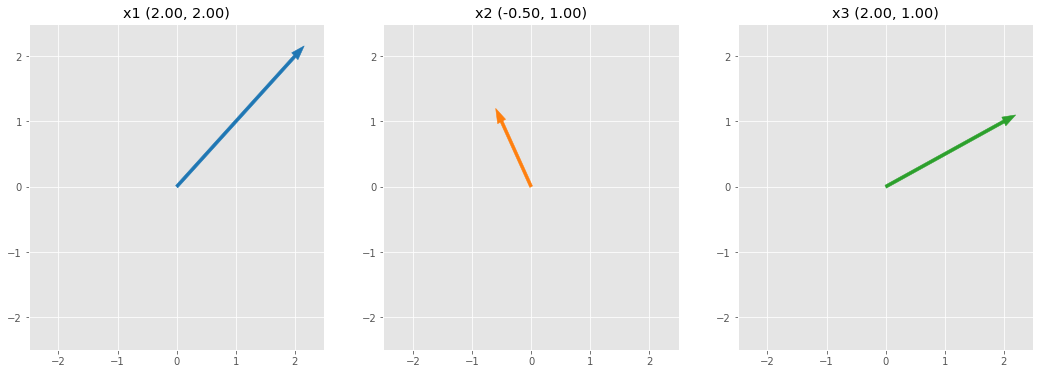

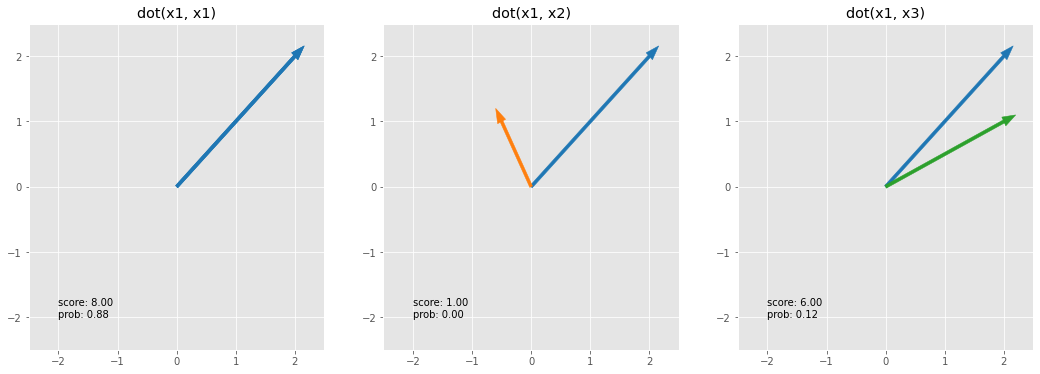

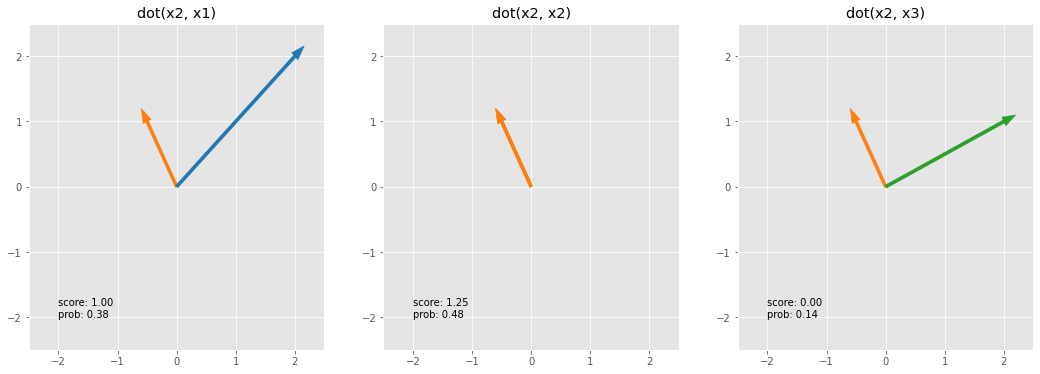

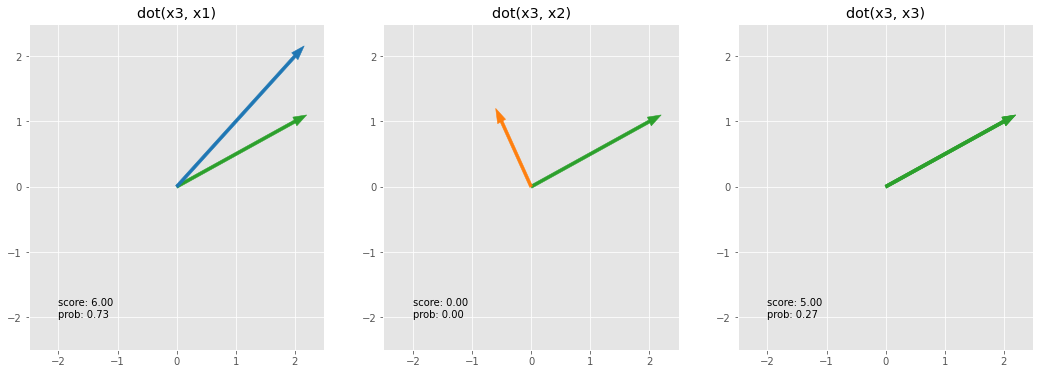

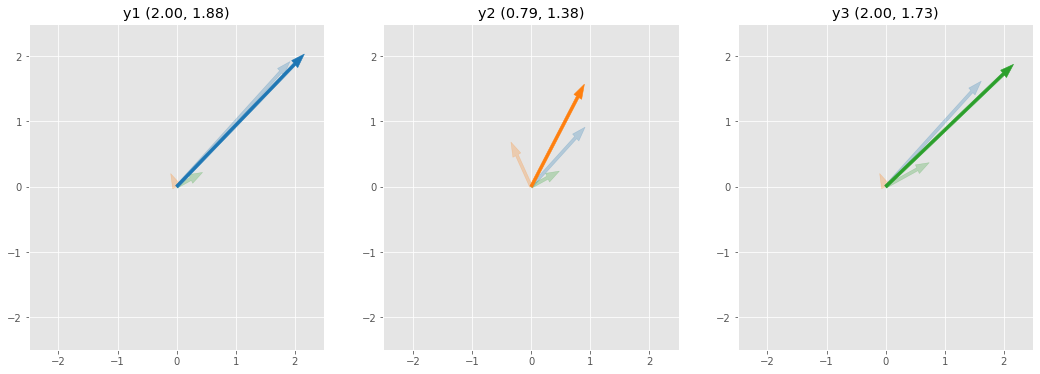

In [0]:
visualize_attn(v1,v2,v3)

# End of notebook